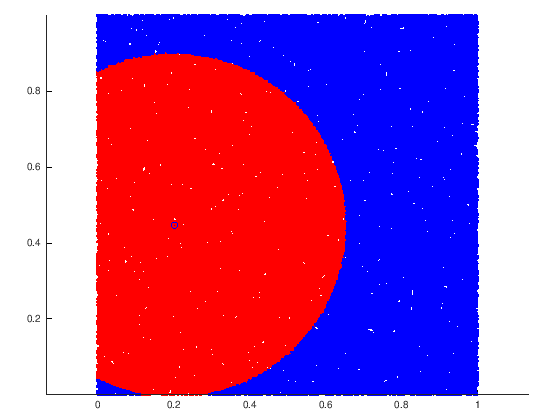

In [14]:
clear;

n = 100000; d = 2; % works for any d
X = rand(n,d);
% assume vantage point is the last one
% get squares of distances from it
d = sqrt( sum((X(1:n-1,:) - X(n,:)).^2,2) );
% and find the median distance
medianDistance = median(d);
% plot them to confirm
clf; hold on; axis equal
plot(X(d <= medianDistance,1), X(d <= medianDistance,2), 'r.')
plot(X(d > medianDistance,1), X(d > medianDistance,2), 'b.')
plot(X(n,1), X(n,2), 'bo') % vantage point

In [16]:
function T = vpTree(X)
% function T = vpTree(X)
% computes the vantage point tree structure with
% T.vp : the vantage point
% T.md : the median distance of the vantage point to the other points
% T.idx : the index of the vantage point in the original set
% T.inner and T.outer : vantage-point subtrees
% of a set of n points in d dimensions with coordinates X(1:n,1:d)
%
    T = vpt(X, 1:size(X,1));
    
    function T = vpt(X, idx)
        n = size(X,1); % number of points
        
        if n == 0
            T = [];
            
        else
            T.vp = X(n,:);
            T.idx = idx(n);
            d = sqrt( sum((X(1:n-1,:) - X(n,:)).^2,2) );
            medianDistance = median(d);
            T.md = medianDistance;
            % split and recurse
            inner = d <= medianDistance;
            T.inner = vpt(X( inner,:), idx( inner));
            T.outer = vpt(X(~inner,:), idx(~inner));
        end
    end
end

In [22]:
T = vpTree(X)

error: median: X cannot be an empty matrix
error: called from
    median at line 70 column 5
    vpt at line 11 column 28
    vpt at line 15 column 21
    vpTree at line 10 column 7


In [23]:
T

error: 'T' undefined near line 1 column 1
